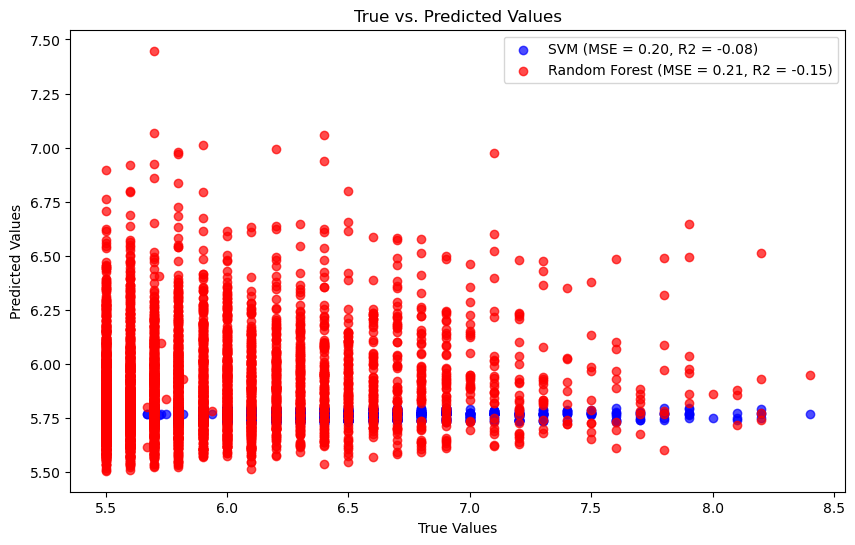

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading dataset and preparing features (X) and target (y)
import pandas as pd

df = pd.read_csv('dataBase 01.csv')

# Assuming that 'X' are the features (all columns except the target) and 'y' is the target column
X = df.drop(columns=['Magnitude'])
y = df['Magnitude']


# Splitting the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Support Vector Machine (SVM) regressor
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

# Training a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_regressor.predict(X_test)
rf_predictions = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
svm_mse = mean_squared_error(y_test, svm_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Calculate R-squared (R2) score
svm_r2 = r2_score(y_test, svm_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_predictions, label=f'SVM (MSE = {svm_mse:.2f}, R2 = {svm_r2:.2f})', color='blue', alpha=0.7)
plt.scatter(y_test, rf_predictions, label=f'Random Forest (MSE = {rf_mse:.2f}, R2 = {rf_r2:.2f})', color='red', alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('True vs. Predicted Values')
plt.show()

In [8]:
import pandas as pd

# Loading the dataset
data = pd.read_csv('dataBase 01.csv')

# Dataset size (number of rows and columns)
num_samples, num_features = data.shape

# Number of classes (the dataset has a 'target'column)
num_classes = data['Magnitude'].nunique()

# Display snapshot (display the first few rows of the dataset)
dataset_snapshot = data.tail()

# Print statistics
print(f"Dataset Size: {num_samples} samples")
print(f"Number of Features: {num_features} features")
print(f"Number of Classes: {num_classes}")
print("Dataset Snapshot:")
print(dataset_snapshot)

Dataset Size: 23412 samples
Number of Features: 3 features
Number of Classes: 64
Dataset Snapshot:
       Latitude  Longitude  Magnitude
23407   38.3917  -118.8941        5.6
23408   38.3777  -118.8957        5.5
23409   36.9179   140.4262        5.9
23410   -9.0283   118.6639        6.3
23411   37.3973   141.4103        5.5


In [3]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Loading dataset and prepare features (X) and target (y)
import pandas as pd

df = pd.read_csv('dataBase 01.csv')

# Assuming that 'X' are the features (all columns except the target) and 'y' is the target column
X = df.drop(columns=['Magnitude'])
y = df['Magnitude']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Initialize variables to measure training time
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Calculate the training time
end_time = time.time()
training_time = end_time - start_time

# Calculate the average time per epoch
average_time_per_epoch = training_time / len(history.history['loss'])

print(f"Training time: {training_time:.2f} seconds")
print(f"Average time per epoch: {average_time_per_epoch:.2f} seconds")

Epoch 1/10
586/586 [==============================] - 2s 2ms/step - loss: 1.7638 - val_loss: 1.0394
Epoch 2/10
586/586 [==============================] - 1s 2ms/step - loss: 0.8124 - val_loss: 0.7900
Epoch 3/10
586/586 [==============================] - 1s 2ms/step - loss: 0.4636 - val_loss: 0.3082
Epoch 4/10
586/586 [==============================] - 1s 2ms/step - loss: 0.3527 - val_loss: 0.4688
Epoch 5/10
586/586 [==============================] - 1s 2ms/step - loss: 0.3038 - val_loss: 0.3563
Epoch 6/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2873 - val_loss: 0.3173
Epoch 7/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2913 - val_loss: 0.2559
Epoch 8/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2752 - val_loss: 0.4310
Epoch 9/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2754 - val_loss: 0.3664
Epoch 10/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2712 - val_loss: 0.3192

In [4]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Loading the dataset and prepare features (X) and target (y)
import pandas as pd

df = pd.read_csv('dataBase 01.csv')

# Assuming that 'X' are the features (all columns except the target) and 'y' is the target column
X = df.drop(columns=['Magnitude'])
y = df['Magnitude']

# Splitting the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Initialize variables to measure training time
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Calculate the training time
end_time = time.time()
training_time = end_time - start_time

# Calculate the average time per epoch
average_time_per_epoch = training_time / len(history.history['loss'])

print(f"Training time: {training_time:.2f} seconds")
print(f"Average time per epoch: {average_time_per_epoch:.2f} seconds")

Epoch 1/10
586/586 [==============================] - 2s 2ms/step - loss: 3.6995 - val_loss: 1.2098
Epoch 2/10
586/586 [==============================] - 1s 2ms/step - loss: 0.9276 - val_loss: 0.6808
Epoch 3/10
586/586 [==============================] - 1s 2ms/step - loss: 0.5301 - val_loss: 0.3339
Epoch 4/10
586/586 [==============================] - 1s 2ms/step - loss: 0.3488 - val_loss: 0.2535
Epoch 5/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2904 - val_loss: 0.3505
Epoch 6/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2960 - val_loss: 0.5103
Epoch 7/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2797 - val_loss: 0.2022
Epoch 8/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2851 - val_loss: 0.2371
Epoch 9/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2963 - val_loss: 0.4006
Epoch 10/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2857 - val_loss: 0.2564

In [5]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Loading dataset and prepare features (X) and target (y)
import pandas as pd

df = pd.read_csv('dataBase 01.csv')

# Assuming that 'X' are the features (all columns except the target) and 'y' is the target column
X = df.drop(columns=['Magnitude'])
y = df['Magnitude']

# Splitting the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Initialize variables to measure training time
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Calculate the training time
end_time = time.time()
training_time = end_time - start_time

# Calculate the average time per epoch
average_time_per_epoch = training_time / len(history.history['loss'])

print(f"Training time: {training_time:.2f} seconds")
print(f"Average time per epoch: {average_time_per_epoch:.2f} seconds")

Epoch 1/10
586/586 [==============================] - 2s 2ms/step - loss: 3.8091 - val_loss: 1.4195
Epoch 2/10
586/586 [==============================] - 1s 2ms/step - loss: 1.0405 - val_loss: 0.7828
Epoch 3/10
586/586 [==============================] - 1s 2ms/step - loss: 0.5580 - val_loss: 0.4074
Epoch 4/10
586/586 [==============================] - 1s 2ms/step - loss: 0.3633 - val_loss: 0.2593
Epoch 5/10
586/586 [==============================] - 1s 2ms/step - loss: 0.3046 - val_loss: 0.3623
Epoch 6/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2980 - val_loss: 0.5958
Epoch 7/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2593 - val_loss: 0.2565
Epoch 8/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2827 - val_loss: 0.3164
Epoch 9/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2954 - val_loss: 0.3982
Epoch 10/10
586/586 [==============================] - 1s 2ms/step - loss: 0.2648 - val_loss: 0.2617